In [189]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

BASE_DIR = './dataset'
DB_FILE = '/uncleaned bike sales data.xlsx'
DATASET = BASE_DIR + DB_FILE

df = pd.read_excel(DATASET)


df.head(50)

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,261695,2021-12-01,1.0,December,2021,39,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",4.0,1252,2295,4172,5008,9180
1,261695,2021-12-01,1.0,December,2021,44,Adults (35-64),M,United Kingdom,England,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1.0,1266,2320,1054,1266,2320
2,261697,2021-12-02,2.0,December,2021,37,Adults (35-64),M,United States,California,Bikes,Mountain Bikes,"Mountain-400-W Silver, 46",2.0,420,769,698,840,1538
3,261698,2021-12-02,2.0,December,2021,31,Young Adults (25-34),F,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-400-W Silver, 42",1.0,420,769,349,420,769
4,261699,2021-12-03,3.0,December,2021,37,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2.0,0,2295,2086,0,4590
5,261700,2021-12-03,3.0,December,2021,24,Youth (<25),F,United Kingdom,England,Bikes,Mountain Bikes,"Mountain-200 Black, 38",1.0,1252,2295,1043,1252,2295
6,261701,2021-12-03,3.0,December,2021,37,Adults (35-64),M,United States,Washington,Bikes,Mountain Bikes,"Mountain-200 Black, 46",1.0,1252,2295,1043,1252,2295
7,261701,2021-12-03,3.0,December,2021,37,Adults (35-64),M,United States,Washington,Bikes,Mountain Bikes,"Mountain-200 Black, 46",1.0,1252,2295,1043,1252,2295
8,261702,2021-12-04,4.0,December,2021,31,Young Adults (25-34),F,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-400-W Silver, 42",4.0,420,0,1396,1680,0
9,261703,2021-12-05,5.0,December,2021,39,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",4.0,1252,2295,4172,5008,9180


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Sales_Order #        89 non-null     int64         
 1   Date                 89 non-null     datetime64[ns]
 2   Day                  88 non-null     float64       
 3   Month                89 non-null     object        
 4   Year                 89 non-null     int64         
 5   Customer_Age         89 non-null     int64         
 6   Age_Group            88 non-null     object        
 7   Customer_Gender      89 non-null     object        
 8   Country              89 non-null     object        
 9   State                89 non-null     object        
 10  Product_Category     89 non-null     object        
 11  Sub_Category         89 non-null     object        
 12  Product_Description  88 non-null     object        
 13  Order_Quantity       88 non-null     

In [191]:
df.isnull().sum()

Sales_Order #          0
Date                   0
Day                    1
Month                  0
Year                   0
Customer_Age           0
Age_Group              1
Customer_Gender        0
Country                0
State                  0
Product_Category       0
Sub_Category           0
Product_Description    1
Order_Quantity         1
 Unit_Cost             0
 Unit_Price            0
 Profit                0
 Cost                  0
Revenue                0
dtype: int64

In [192]:
df.columns = df.columns.str.lower().str.strip()
df.columns

Index(['sales_order #', 'date', 'day', 'month', 'year', 'customer_age',
       'age_group', 'customer_gender', 'country', 'state', 'product_category',
       'sub_category', 'product_description', 'order_quantity', 'unit_cost',
       'unit_price', 'profit', 'cost', 'revenue'],
      dtype='object')

In [193]:

df['product_description'] = df['product_description'].fillna('No description provided')

df['date'] = pd.to_datetime(df['date'], errors='coerce')

df['day'] = df['date'].dt.day
df['day'] = df['day'].fillna(1)

df['order_quantity'] = df['order_quantity'].fillna(df['revenue'] / df['unit_price'])


In [194]:
def assign_age_group(age):
    if age < 25:
        return 'Youth (<25)'
    elif 25 <= age <= 34:
        return 'Young Adults (25-34)'
    elif 35 <= age <= 64:
        return 'Adults (35-64)'
    else:
        return 'Seniors (65+)'

df['age_group'] = df.apply(lambda row: assign_age_group(row['customer_age']) 

if pd.isna(row['age_group']) 
else row['age_group'], axis=1)

df['age_group'] = pd.Categorical(df['age_group'], categories=['Youth (<25)', 'Young Adults (25-34)', 'Adults (35-64)', 'Seniors (65+)'], ordered=True)

df.isnull().sum()

sales_order #          0
date                   0
day                    0
month                  0
year                   0
customer_age           0
age_group              0
customer_gender        0
country                0
state                  0
product_category       0
sub_category           0
product_description    0
order_quantity         0
unit_cost              0
unit_price             0
profit                 0
cost                   0
revenue                0
dtype: int64

In [195]:
df.describe()

,sales_order #,date,day,year,customer_age,order_quantity,unit_cost,unit_price,profit,cost,revenue
count,89.000000,89,89.000000,89.0,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.00000
mean,261738.067416,2021-12-13 10:31:00.674157312,13.438202,2021.0,34.202247,2.101124,1052.247191,1940.943820,1848.887640,2204.235955,4043.94382
min,261695.000000,2021-12-01 00:00:00,1.000000,2021.0,17.000000,0.000000,0.000000,0.000000,245.000000,0.000000,0.00000
25%,261716.000000,2021-12-08 00:00:00,8.000000,2021.0,30.000000,1.000000,420.000000,2295.000000,1043.000000,1252.000000,2295.00000
50%,261738.000000,2021-12-13 00:00:00,13.000000,2021.0,35.000000,2.000000,1252.000000,2295.000000,1054.000000,1266.000000,2320.00000
75%,261760.000000,2021-12-19 00:00:00,19.000000,2021.0,38.000000,3.000000,1266.000000,2320.000000,2954.000000,3756.000000,6750.00000
max,261782.000000,2021-12-24 00:00:00,24.000000,2021.0,63.000000,4.000000,1912.000000,3400.000000,5908.000000,7592.000000,13500.00000
std,25.729713,NaN,6.418997,0.0,8.090651,1.252678,440.499001,789.955743,1394.401162,1730.330926,3139.75858


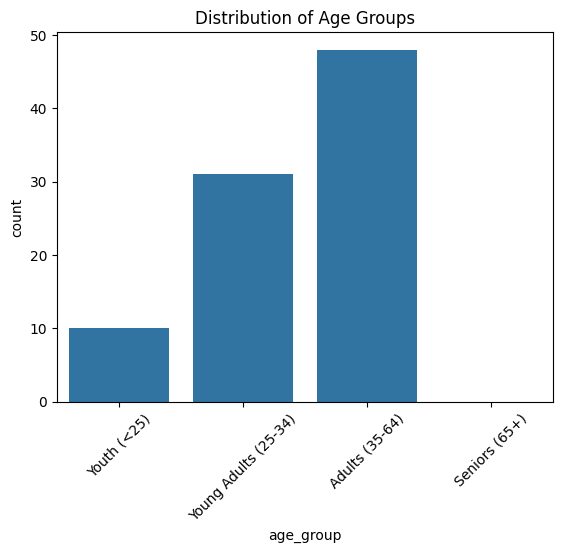

In [196]:
sns.countplot(x='age_group', data=df)
plt.title('Distribution of Age Groups')
plt.xticks(rotation=45)
plt.show()

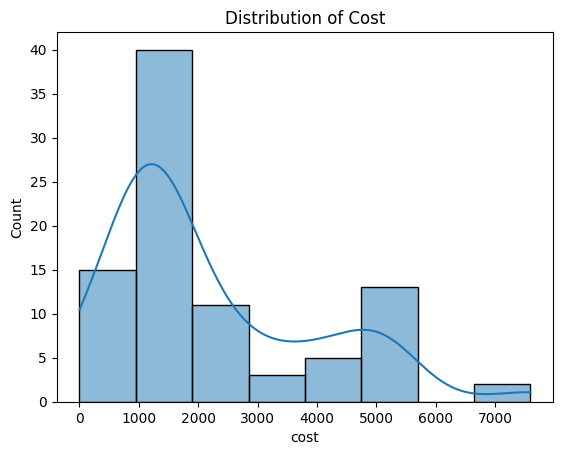

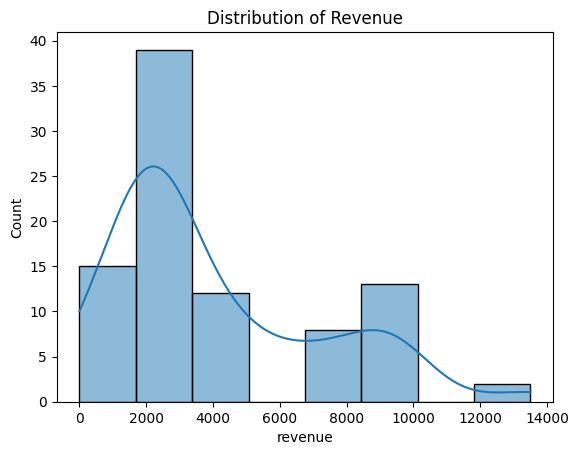

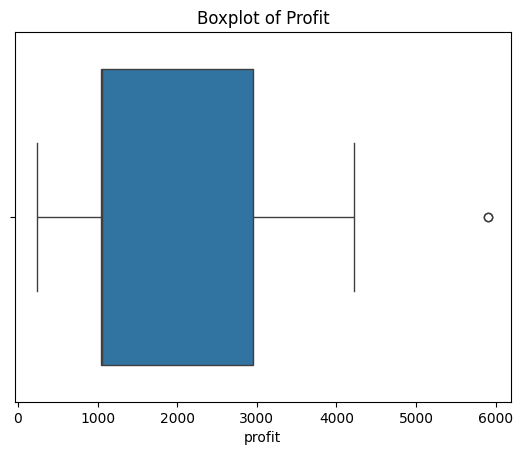

In [197]:
sns.histplot(df['cost'], kde=True)
plt.title('Distribution of Cost')
plt.show()

sns.histplot(df['revenue'], kde=True)
plt.title('Distribution of Revenue')
plt.show()

sns.boxplot(x=df['profit'])
plt.title('Boxplot of Profit')
plt.show()

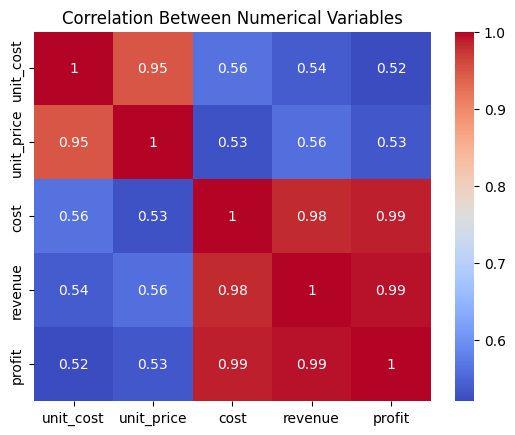

In [198]:
corr_matrix = df[['unit_cost', 'unit_price', 'cost', 'revenue', 'profit']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Numerical Variables')
plt.show()

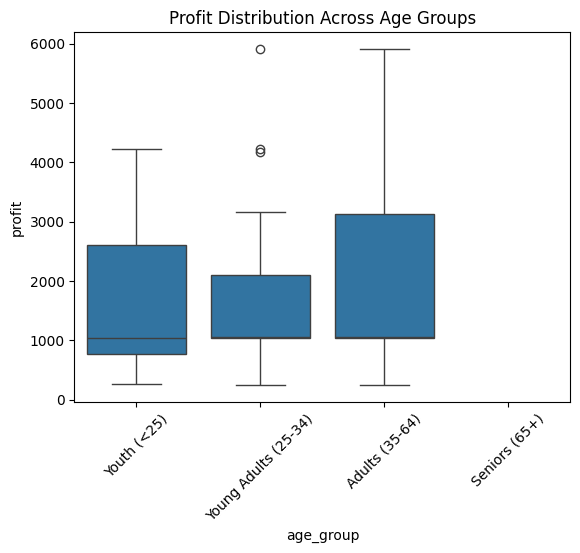

In [199]:
sns.boxplot(x='age_group', y='profit', data=df)
plt.title('Profit Distribution Across Age Groups')
plt.xticks(rotation=45)
plt.show()

In [ ]:
sns.scatterplot(x='order_quantity', y='revenue', data=df)
plt.title('Order Quantity vs Revenue')
plt.show()
